In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('UsedCarsSA_Unclean_EN.csv')
data.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [3]:
data.shape

(8248, 15)

In [4]:
data.duplicated().sum()

20

In [5]:
data=data.drop_duplicates()
data.duplicated().sum()

0

In [6]:
data.shape

(8228, 15)

In [7]:
data.describe(include='all')

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
count,8228,8228,8228,8228.000000,8133,8228,8119,5965.000000,8228,8154,8228,8.228000e+03,8228,8228,8228
unique,8228,65,435,NaN,3,15,3,NaN,3,2,1,NaN,27,549,2
top,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Toyota,Land Cruiser,NaN,Saudi,White,Full,NaN,Gas,Automatic,Used,NaN,Riyadh,Negotiable,False
freq,1,2067,373,NaN,6071,3563,3231,NaN,8031,7050,8228,NaN,3300,2592,5636
mean,NaN,NaN,NaN,2014.012275,NaN,NaN,NaN,3.176932,NaN,NaN,NaN,1.496074e+05,NaN,NaN,NaN
std,NaN,NaN,NaN,5.933833,NaN,NaN,NaN,1.568393,NaN,NaN,NaN,3.459146e+05,NaN,NaN,NaN
min,NaN,NaN,NaN,1936.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000e+02,NaN,NaN,NaN
25%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,3.700000e+04,NaN,NaN,NaN
50%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,1.020000e+05,NaN,NaN,NaN
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1.960000e+05,NaN,NaN,NaN


In [8]:
data=data.drop(['Link'],axis=1)
data.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8228 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8228 non-null   object 
 1   Type         8228 non-null   object 
 2   Year         8228 non-null   int64  
 3   Origin       8133 non-null   object 
 4   Color        8228 non-null   object 
 5   Options      8119 non-null   object 
 6   Engine_Size  5965 non-null   float64
 7   Fuel_Type    8228 non-null   object 
 8   Gear_Type    8154 non-null   object 
 9   Condition    8228 non-null   object 
 10  Mileage      8228 non-null   int64  
 11  Region       8228 non-null   object 
 12  Price        8228 non-null   object 
 13  Negotiable   8228 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 908.0+ KB


In [10]:
data.isnull().sum()

Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2263
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

In [11]:
data.isnull().sum()/len(data)*100

Make            0.000000
Type            0.000000
Year            0.000000
Origin          1.154594
Color           0.000000
Options         1.324745
Engine_Size    27.503646
Fuel_Type       0.000000
Gear_Type       0.899368
Condition       0.000000
Mileage         0.000000
Region          0.000000
Price           0.000000
Negotiable      0.000000
dtype: float64

In [12]:
data.describe(include='all')

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
count,8228,8228,8228.000000,8133,8228,8119,5965.000000,8228,8154,8228,8.228000e+03,8228,8228,8228
unique,65,435,NaN,3,15,3,NaN,3,2,1,NaN,27,549,2
top,Toyota,Land Cruiser,NaN,Saudi,White,Full,NaN,Gas,Automatic,Used,NaN,Riyadh,Negotiable,False
freq,2067,373,NaN,6071,3563,3231,NaN,8031,7050,8228,NaN,3300,2592,5636
mean,NaN,NaN,2014.012275,NaN,NaN,NaN,3.176932,NaN,NaN,NaN,1.496074e+05,NaN,NaN,NaN
std,NaN,NaN,5.933833,NaN,NaN,NaN,1.568393,NaN,NaN,NaN,3.459146e+05,NaN,NaN,NaN
min,NaN,NaN,1936.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000e+02,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,3.700000e+04,NaN,NaN,NaN
50%,NaN,NaN,2016.000000,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,1.020000e+05,NaN,NaN,NaN
75%,NaN,NaN,2018.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,1.960000e+05,NaN,NaN,NaN


In [13]:
data['Year'].value_counts().head()

2016    1212
2015     830
2017     817
2018     775
2019     641
Name: Year, dtype: int64

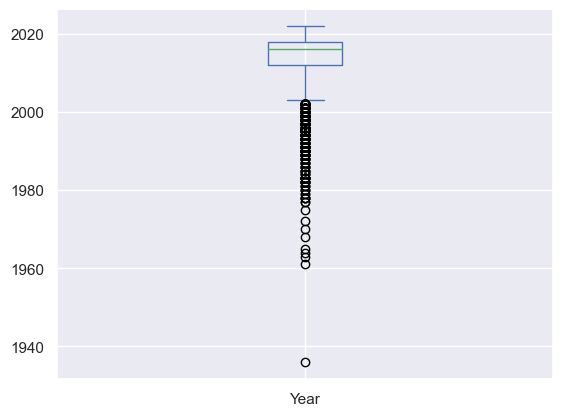

In [14]:
data['Year'].plot(kind='box')
plt.show()

In [15]:
q5=np.percentile(data['Year'],5)
q25=np.percentile(data['Year'],25)
q75=np.percentile(data['Year'],75)
q95=np.percentile(data['Year'],95)
IQR=q75-q25
lower_limit=q25-1.5*IQR
upper_limit=q75+1.5*IQR
data['Year']=np.where(data['Year']<lower_limit,q5,(np.where(data['Year']>upper_limit,q95,data['Year'])))

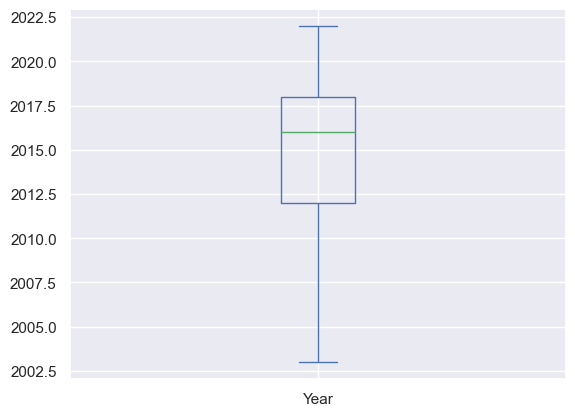

In [16]:
data['Year'].plot(kind='box')
plt.show()

In [17]:
data['Price'].value_counts()

Negotiable    2592
45000          141
35000          127
55000          127
30000          120
              ... 
345000           1
428000           1
169500           1
1000             1
1                1
Name: Price, Length: 549, dtype: int64

In [18]:
data['Price']=pd.to_numeric(data['Price'],errors='coerce')

In [19]:
data['Price'].isnull().sum()

2592

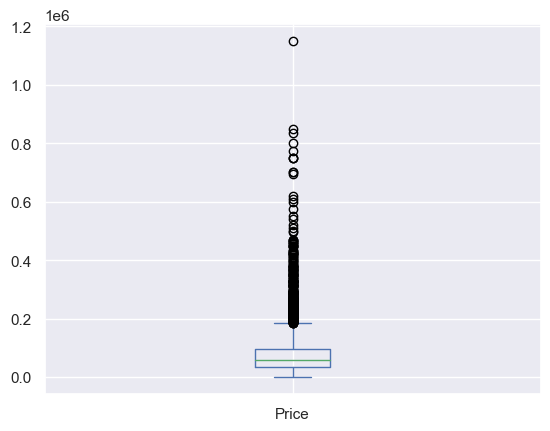

In [20]:
data['Price'].plot(kind='box')
plt.show()

In [21]:
data['Price']=data['Price'].fillna(data['Price'].median())

In [22]:
print('Before drop:',data.shape)
data.drop(data[data['Price']<=1].index,axis=0,inplace=True)
print('After drop:',data.shape)

Before drop: (8228, 14)
After drop: (8226, 14)


In [23]:
data['Price'].value_counts()

58000.0     2652
45000.0      141
55000.0      127
35000.0      127
30000.0      120
            ... 
498000.0       1
345000.0       1
428000.0       1
169500.0       1
2122.0         1
Name: Price, Length: 546, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8226 non-null   object 
 1   Type         8226 non-null   object 
 2   Year         8226 non-null   float64
 3   Origin       8131 non-null   object 
 4   Color        8226 non-null   object 
 5   Options      8117 non-null   object 
 6   Engine_Size  5964 non-null   float64
 7   Fuel_Type    8226 non-null   object 
 8   Gear_Type    8152 non-null   object 
 9   Condition    8226 non-null   object 
 10  Mileage      8226 non-null   int64  
 11  Region       8226 non-null   object 
 12  Price        8226 non-null   float64
 13  Negotiable   8226 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 907.8+ KB


In [25]:
data['Region'].value_counts().head()

Riyadh       3299
Dammam       1404
Jeddah       1075
Qassim        316
Al-Medina     304
Name: Region, dtype: int64

In [26]:
data['Mileage'].value_counts().head()

300000    125
200000     96
300        68
100000     67
90000      51
Name: Mileage, dtype: int64

In [27]:
data.rename(columns={'Mileage':'Km_run'},inplace=True)
data.rename(columns={'Type':'Model'},inplace=True)

In [28]:
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Km_run,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,58000.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500.0,False


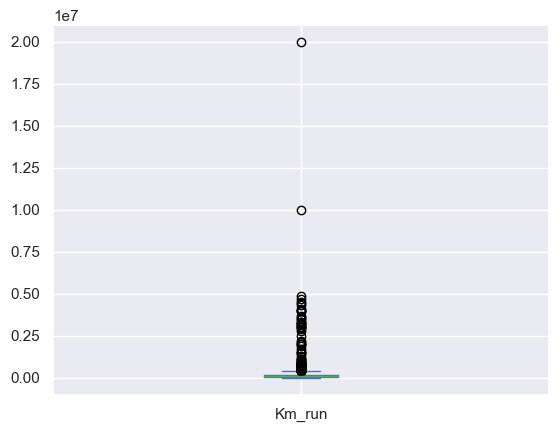

In [29]:
data['Km_run'].plot(kind='box')
plt.show()

In [30]:
q5=np.percentile(data['Km_run'],5)
q25=np.percentile(data['Km_run'],25)
q75=np.percentile(data['Km_run'],75)
q95=np.percentile(data['Km_run'],95)
IQR=q75-q25
lower_limit=q25-1.5*IQR
upper_limit=q75+1.5*IQR
data['Km_run']=np.where(data['Km_run']<lower_limit,q5,(np.where(data['Km_run']>upper_limit,q95,data['Km_run'])))

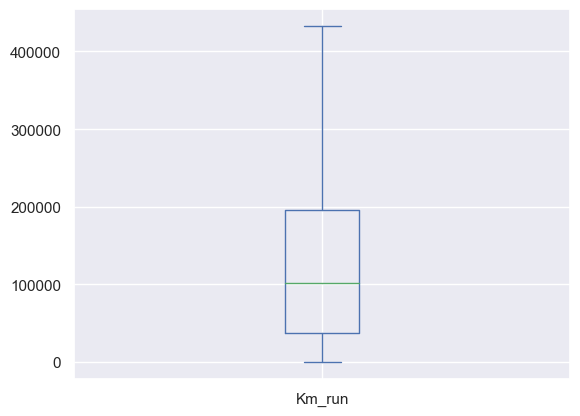

In [31]:
data['Km_run'].plot(kind='box')
plt.show()

In [32]:
data['Gear_Type'].value_counts()

Automatic    7048
Manual       1104
Name: Gear_Type, dtype: int64

In [33]:
data['Gear_Type'].isnull().sum()

74

In [34]:
data['Gear_Type'].mode()

0    Automatic
Name: Gear_Type, dtype: object

In [35]:
data['Gear_Type']=data['Gear_Type'].fillna(data['Gear_Type'].mode()[0])

In [36]:
data['Gear_Type'].isnull().sum()

0

In [37]:
data['Fuel_Type'].value_counts()

Gas       8029
Diesel     173
Hybrid      24
Name: Fuel_Type, dtype: int64

In [38]:
data['Options'].value_counts()

Full         3230
Standard     2642
Semi Full    2245
Name: Options, dtype: int64

In [39]:
data['Options'].isnull().sum()

109

In [40]:
data['Options'].mode()

0    Full
Name: Options, dtype: object

In [41]:
data['Options']=data['Options'].fillna(data['Options'].mode()[0])

In [42]:
data['Options'].value_counts()

Full         3339
Standard     2642
Semi Full    2245
Name: Options, dtype: int64

In [43]:
data['Color'].value_counts().head()

White            3562
Black             962
Silver            907
Grey              730
Another Color     545
Name: Color, dtype: int64

In [44]:
data['Color'].nunique()

15

In [45]:
data['Make'].unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'GMC',
       'Chevrolet', 'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'Mazda',
       'Ford', 'Kia', 'Genesis', 'Cadillac', 'Geely', 'MG', 'Jeep',
       'INFINITI', 'Dodge', 'Ferrari', 'Great Wall', 'Jaguar', 'GAC',
       'Renault', 'Suzuki', 'Peugeot', 'Changan', 'HAVAL', 'BMW',
       'Rolls-Royce', 'Porsche', 'Mitsubishi', 'Isuzu', 'Subaru',
       'Zhengzhou', 'Audi', 'Lincoln', 'Volkswagen', 'Daihatsu', 'Fiat',
       'Bentley', 'FAW', 'Chery', 'Aston Martin', 'Pontiac', 'Mercury',
       'BYD', 'Classic', 'SsangYong', 'Hummer', 'Other', 'Maserati',
       'Lifan', 'Foton', 'Tata', 'Victory Auto', 'Škoda', 'JAC', 'Iveco',
       'Volvo', 'Ashok', 'MAN', 'Buick'], dtype=object)

In [46]:
data['Make'].nunique()

65

In [47]:
data['Make'].value_counts().head()

Toyota       2066
Hyundai       950
Ford          778
Chevrolet     667
Nissan        552
Name: Make, dtype: int64

In [48]:
data['Model'].value_counts().head()

Land Cruiser    373
Camry           329
Hilux           292
Accent          253
Yukon           230
Name: Model, dtype: int64

In [49]:
data['Origin'].value_counts()

Saudi          6070
Other          1043
Gulf Arabic    1018
Name: Origin, dtype: int64

In [50]:
data['Origin'].isnull().sum()

95

In [51]:
data['Origin'].mode()

0    Saudi
Name: Origin, dtype: object

In [52]:
data['Origin']=data['Origin'].fillna(data['Origin'].mode()[0])

In [53]:
data['Origin'].isnull().sum()

0

In [54]:
data['Negotiable']=data['Negotiable'].astype(str)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8226 non-null   object 
 1   Model        8226 non-null   object 
 2   Year         8226 non-null   float64
 3   Origin       8226 non-null   object 
 4   Color        8226 non-null   object 
 5   Options      8226 non-null   object 
 6   Engine_Size  5964 non-null   float64
 7   Fuel_Type    8226 non-null   object 
 8   Gear_Type    8226 non-null   object 
 9   Condition    8226 non-null   object 
 10  Km_run       8226 non-null   float64
 11  Region       8226 non-null   object 
 12  Price        8226 non-null   float64
 13  Negotiable   8226 non-null   object 
dtypes: float64(4), object(10)
memory usage: 964.0+ KB


In [56]:
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Km_run,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000.0,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,Used,5448.0,Riyadh,58000.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912.0,Riyadh,59500.0,False


In [57]:
data['Negotiable']=np.where(data['Negotiable']=='True','Yes','No')

In [58]:
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Km_run,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000.0,Riyadh,114000.0,No
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,Used,5448.0,Riyadh,58000.0,Yes
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418.0,Riyadh,27500.0,No
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154.0,Riyadh,43000.0,No
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912.0,Riyadh,59500.0,No


In [59]:
data['Condition'].value_counts()

Used    8226
Name: Condition, dtype: int64

In [60]:
data['Engine_Size'].isnull().sum()

2262

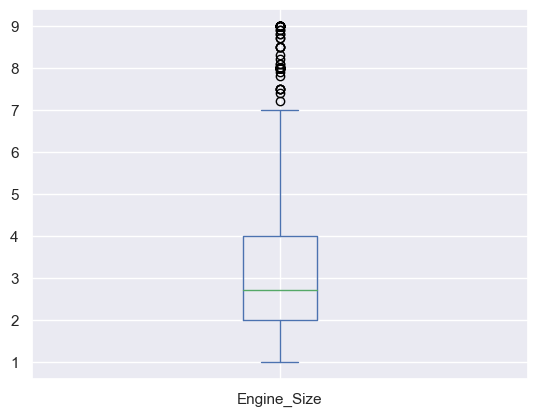

In [61]:
data['Engine_Size'].plot(kind='box')
plt.show()

In [62]:
data['Engine_Size']=data['Engine_Size'].fillna(data['Engine_Size'].median())

In [63]:
q5=np.percentile(data['Engine_Size'],5)
q25=np.percentile(data['Engine_Size'],25)
q75=np.percentile(data['Engine_Size'],75)
q95=np.percentile(data['Engine_Size'],95)
IQR=q75-q25
lower_limit=q25-1.5*IQR
upper_limit=q75+1.5*IQR
data['Engine_Size']=np.where(data['Engine_Size']<lower_limit,q5,(np.where(data['Engine_Size']>upper_limit,upper_limit,data['Engine_Size'])))

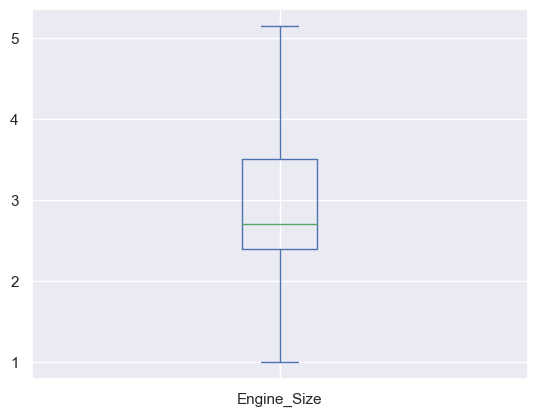

In [64]:
data['Engine_Size'].plot(kind='box')
plt.show()

In [65]:
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Km_run,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.15,Gas,Automatic,Used,103000.0,Riyadh,114000.0,No
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.80,Gas,Automatic,Used,5448.0,Riyadh,58000.0,Yes
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.50,Gas,Automatic,Used,72418.0,Riyadh,27500.0,No
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.60,Gas,Automatic,Used,114154.0,Riyadh,43000.0,No
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.00,Gas,Automatic,Used,41912.0,Riyadh,59500.0,No


<Figure size 1000x800 with 0 Axes>

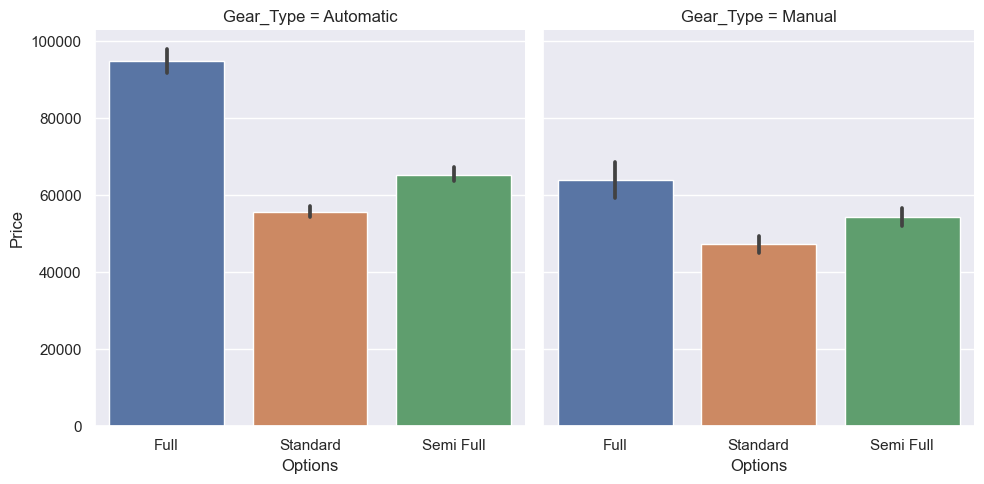

In [66]:
plt.figure(figsize=(10,8))
sns.catplot(data,x='Options',y='Price',kind='bar',col='Gear_Type')
plt.show()

<Figure size 1000x800 with 0 Axes>

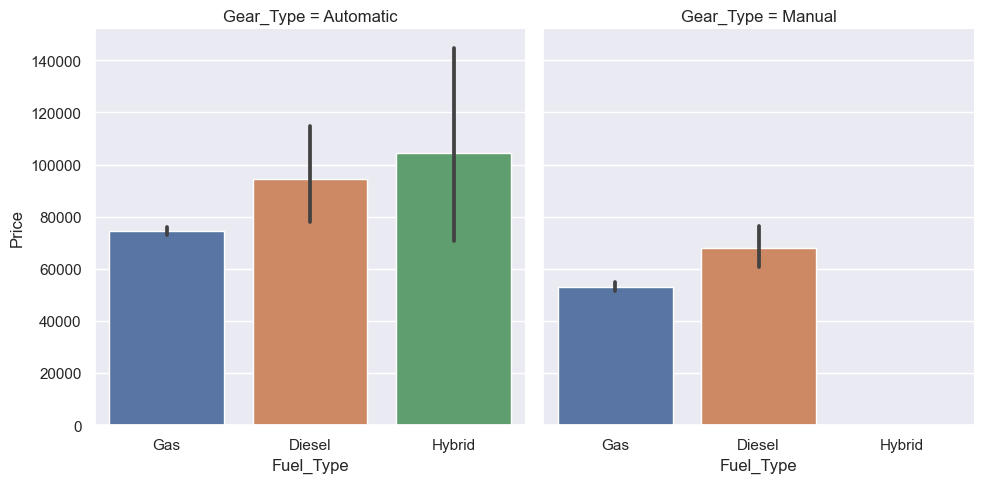

In [67]:
plt.figure(figsize=(10,8))
sns.catplot(data,x='Fuel_Type',y='Price',kind='bar',col='Gear_Type')
plt.show()

In [68]:
X=data.groupby('Make')['Price'].max().sort_values(ascending=False).head()
X

Make
Mercedes        1150000.0
Bentley          850000.0
Rolls-Royce      700000.0
Land Rover       700000.0
Aston Martin     550000.0
Name: Price, dtype: float64

In [69]:
Y=data.groupby('Model')['Price'].max().sort_values(ascending=False).head()
Y

Model
G           1150000.0
Bentayga     850000.0
Arnage       772500.0
S            748000.0
Ghost        700000.0
Name: Price, dtype: float64

In [70]:
Z=data.groupby('Color')['Price'].max().sort_values(ascending=False).head()
Z

Color
Black            1150000.0
Another Color     850000.0
Grey              835000.0
White             750000.0
Red               620000.0
Name: Price, dtype: float64

In [71]:
A=data.groupby('Fuel_Type')['Price'].max().sort_values(ascending=False)
A

Fuel_Type
Gas       1150000.0
Diesel     540000.0
Hybrid     375000.0
Name: Price, dtype: float64

In [72]:
B=data.groupby('Region')['Price'].max().sort_values(ascending=False).head()
B

Region
Riyadh       1150000.0
Dammam        850000.0
Jeddah        772500.0
Al-Medina     460500.0
Makkah        450000.0
Name: Price, dtype: float64

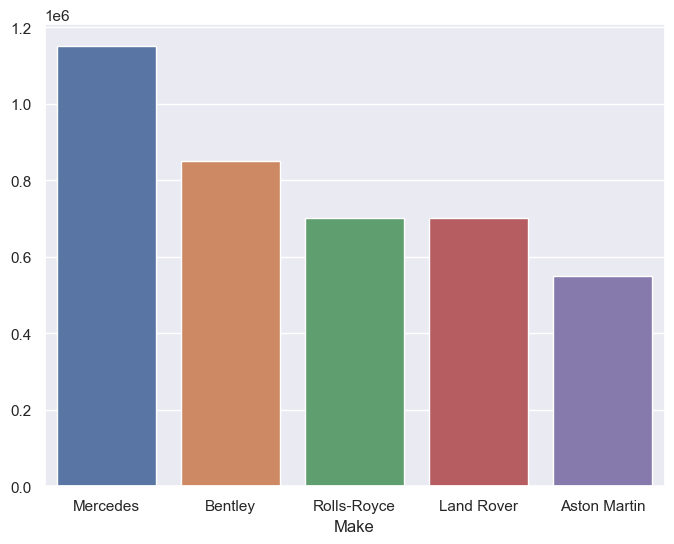

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(data,x=X.index,y=X.values)
plt.show()

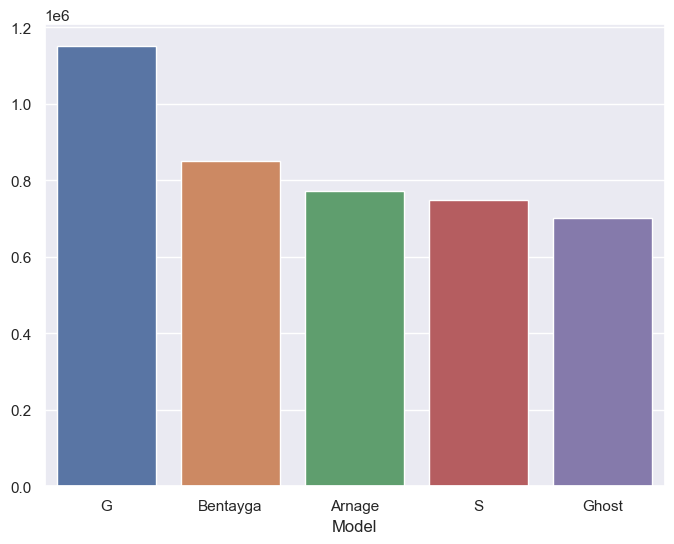

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(data,x=Y.index,y=Y.values)
plt.show()

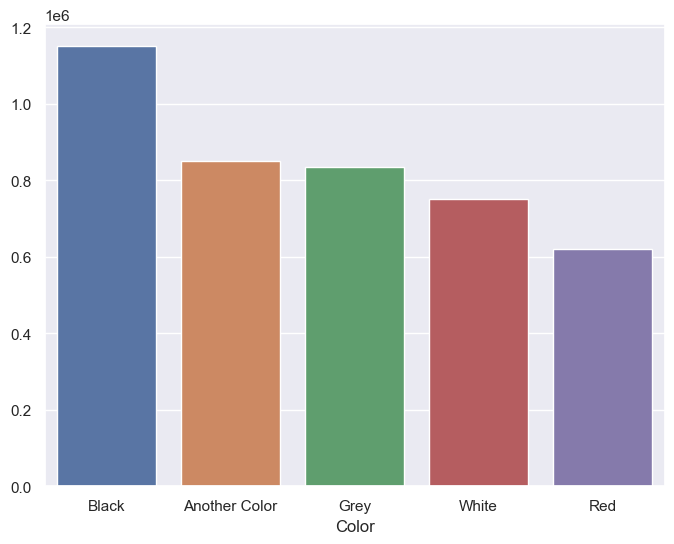

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(data,x=Z.index,y=Z.values)
plt.show()

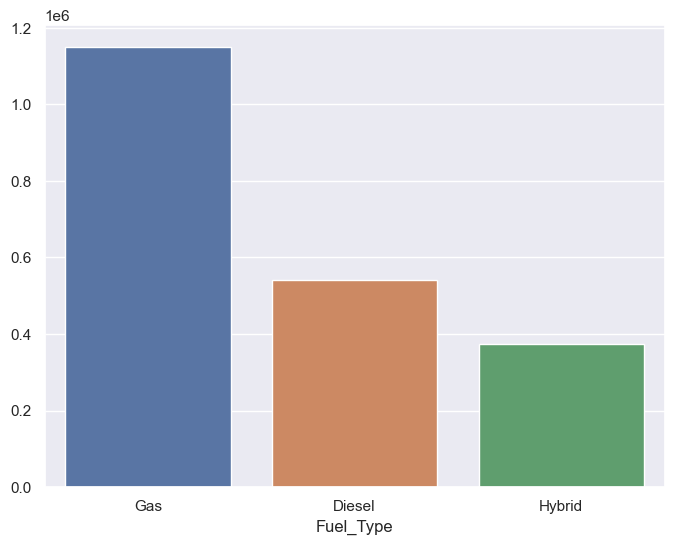

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(data,x=A.index,y=A.values)
plt.show()

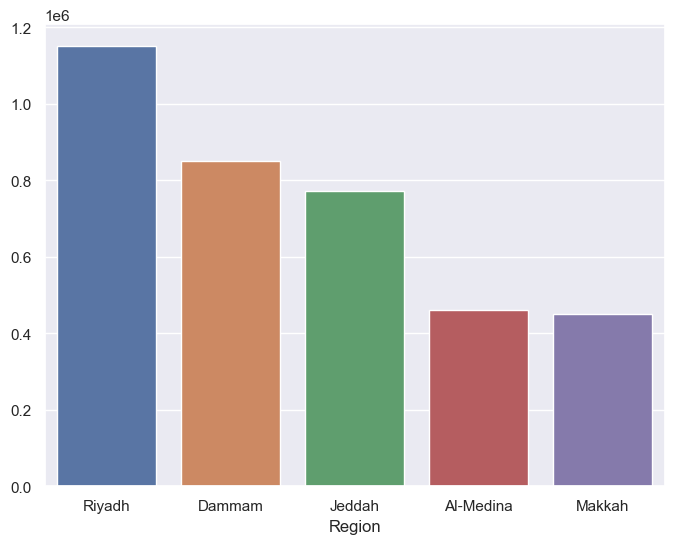

In [77]:
plt.figure(figsize=(8,6))
sns.barplot(data,x=B.index,y=B.values)
plt.show()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8226 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8226 non-null   object 
 1   Model        8226 non-null   object 
 2   Year         8226 non-null   float64
 3   Origin       8226 non-null   object 
 4   Color        8226 non-null   object 
 5   Options      8226 non-null   object 
 6   Engine_Size  8226 non-null   float64
 7   Fuel_Type    8226 non-null   object 
 8   Gear_Type    8226 non-null   object 
 9   Condition    8226 non-null   object 
 10  Km_run       8226 non-null   float64
 11  Region       8226 non-null   object 
 12  Price        8226 non-null   float64
 13  Negotiable   8226 non-null   object 
dtypes: float64(4), object(10)
memory usage: 964.0+ KB


In [79]:
cat_col=['Gear_Type','Negotiable','Make','Model','Condition']
cat_col

['Gear_Type', 'Negotiable', 'Make', 'Model', 'Condition']

In [80]:
le=LabelEncoder()
for i in cat_col:
    data[i]=le.fit_transform(data[i])

In [81]:
data.head()

,Make,Model,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Km_run,Region,Price,Negotiable
0,11,63,2018.0,Saudi,Black,Full,5.15,Gas,0,0,103000.0,Riyadh,114000.0,0
1,48,295,2016.0,Saudi,White,Full,4.80,Gas,0,0,5448.0,Riyadh,58000.0,1
2,48,362,2019.0,Saudi,Silver,Standard,1.50,Gas,0,0,72418.0,Riyadh,27500.0,0
3,28,154,2019.0,Saudi,Grey,Standard,1.60,Gas,0,0,114154.0,Riyadh,43000.0,0
4,28,154,2019.0,Saudi,Silver,Semi Full,2.00,Gas,0,0,41912.0,Riyadh,59500.0,0


In [82]:
data=pd.get_dummies(data,columns=['Origin','Color','Options','Fuel_Type','Region'],drop_first=True)
data.head()

,Make,Model,Year,Engine_Size,Gear_Type,Condition,Km_run,Price,Negotiable,Origin_Other,...,Region_Najran,Region_Qassim,Region_Qurayyat,Region_Riyadh,Region_Sabya,Region_Sakaka,Region_Tabouk,Region_Taef,Region_Wadi Dawasir,Region_Yanbu
0,11,63,2018.0,5.15,0,0,103000.0,114000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,48,295,2016.0,4.80,0,0,5448.0,58000.0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,48,362,2019.0,1.50,0,0,72418.0,27500.0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,28,154,2019.0,1.60,0,0,114154.0,43000.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,28,154,2019.0,2.00,0,0,41912.0,59500.0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
x=data.drop(['Price'],axis=1)
y=data['Price']

In [84]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(8226, 54)

In [85]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.270787,Make
1,1.073008,Model
2,1.568238,Year
3,1.171346,Engine_Size
4,1.319644,Gear_Type
5,NaN,Condition
6,1.292214,Km_run
7,1.109412,Negotiable
8,1.911626,Origin_Other
9,1.869549,Origin_Saudi


In [86]:
data1=data.copy()

In [87]:
data1=data1.drop(['Region_Riyadh','Condition'],axis=1)

In [88]:
x=data1.drop(['Price'],axis=1)
y=data1['Price']

In [89]:
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
variable=sc_x
variable.shape

(8226, 52)

In [90]:
vif=pd.DataFrame()
vif['variance inflation factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns
vif

,variance inflation factor,features
0,1.270724,Make
1,1.072701,Model
2,1.564143,Year
3,1.171082,Engine_Size
4,1.318192,Gear_Type
5,1.292051,Km_run
6,1.107946,Negotiable
7,1.910147,Origin_Other
8,1.868288,Origin_Saudi
9,2.485338,Color_Black


In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6169, 52) (2057, 52) (6169,) (2057,)


In [92]:
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                              233.8
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                        0.00
Time:                        19:23:28   Log-Likelihood:                         -76195.
No. Observations:                6169   AIC:                                  1.525e+05
Df Residuals:                    6117   BIC:                                  1.528e+05
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Make                    341.9880     44.804      7.633      0.000     254.157     429.819
Model                    25.1793      6.122      4.113      0.000      13.178      37.180
Year                     46.4163      3.482     13.330      0.000      39.590      53.242
Engine_Size            1.337e+04    688.176     19.429      0.000     1.2e+04    1.47e+04
Gear_Type              -1.17e+04   2331.563     -5.019      0.000   -1.63e+04   -7131.863
Km_run                   -0.1325      0.007    -19.796      0.000      -0.146      -0.119
Negotiable            -1.859e+04   1606.119    -11.573      0.000   -2.17e+04   -1.54e+04
Origin_Other          -1.786e+04   2962.451     -6.030      0.000   -2.37e+04   -1.21e+04
Origin_Saudi          -1.966e+04   2251.903     -8.729      0.000   -2.41e+04   -1.52e+04
Color_Black            1.296e+04   3514.139      3.689      0.000    6073.544    1.99e+04
Color_Blue            -7341.7393   5083.241     -1.444      0.149   -1.73e+04    2623.201
Color_Bronze           3643.8720   5760.473      0.633      0.527   -7648.681    1.49e+04
Color_Brown           -4344.9750   4570.022     -0.951      0.342   -1.33e+04    4613.877
Color_Golden           1544.5934   5314.861      0.291      0.771   -8874.405     1.2e+04
Color_Green           -1.204e+04   1.07e+04     -1.126      0.260    -3.3e+04    8928.385
Color_Grey             4513.9449   3726.856      1.211      0.226   -2792.004    1.18e+04
Color_Navy             5187.9155   5700.694      0.910      0.363   -5987.450    1.64e+04
Color_Oily            -2720.0817   9341.576     -0.291      0.771    -2.1e+04    1.56e+04
Color_Orange          -2.465e+04    1.8e+04     -1.366      0.172      -6e+04    1.07e+04
Color_Red              1569.2885   4854.529      0.323      0.747   -7947.297    1.11e+04
Color_Silver          -8305.4690   3593.729     -2.311      0.021   -1.54e+04   -1260.495
Color_White            1045.2156   3054.585      0.342      0.732   -4942.846    7033.277
Color_Yellow          -9928.9949   1.72e+04     -0.577      0.564   -4.37e+04    2.38e+04
Options_Semi Full     -2.142e+04   1810.243    -11.830      0.000    -2.5e+04   -1.79e+04
Options_Standard      -2.865e+04   1816.705    -15.773      0.000   -3.22e+04   -2.51e+04
Fuel_Type_Gas         -2.031e+04   5097.012     -3.984      0.000   -3.03e+04   -1.03e+04
Fuel_Type_Hybrid       1.397e+04    1.5e+04      0.931      0.352   -1.54e+04    4.34e+04
Region_Al-Ahsa        -8454.9821   4457.267     -1.897      0.058   -1.72e+04     282.829
Region_Al-Baha        -1.747e+04   9483.052     -1.842      0.066   -3.61e+04    1121.841
Region_Al-Jouf        -3.741e+04   1.11e+04     -3.363      0.001   -5.92e+04   -1.56e+04
Region_Al-Medi

In [93]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [95]:
def models(model):
    train_pred=model.predict(x_train)
    pred_test=model.predict(x_test)
    print('Training Accuracy is: ',r2_score(y_train,train_pred))
    print('Test Accuracy is: ',r2_score(y_test,pred_test))

In [102]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
models(xgb)

Training Accuracy is:  0.9730407105052965
Test Accuracy is:  0.7870137453373829


In [105]:
cvs=cross_val_score(xgb,x_train,y_train,cv=10)
print('Avg Training Accuracy is: ',cvs.mean())
print('Max Training Accuracy is: ',cvs.max())

Avg Training Accuracy is:  0.7876868235534455
Max Training Accuracy is:  0.8682566985732902
